In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [145]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [321]:
food_waste = pd.read_csv("01_FOOD_WASTE.csv", encoding='cp949')
korean = pd.read_csv("korean.csv")
longterm_frgn = pd.read_csv("longterm_frgn.csv", encoding='cp949')
shortterm_frgn = pd.read_csv("shortterm_frgn.csv", encoding='cp949')
residentpop = pd.read_csv("residentpop.csv", encoding='cp949')
cardspending= pd.read_csv("cardspending.csv", encoding='cp949')

c:\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [147]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [148]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])
food_waste['year'] = food_waste['base_date'].dt.year
food_waste['month'] = food_waste['base_date'].dt.month

In [149]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [150]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,41102950
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


In [151]:
food_waste = pd.get_dummies(foodwaste, columns=['month'])

In [152]:
food_waste_x = food_waste.drop(['year','emd_nm', 'em_g', 'month_12'], axis=1)
food_waste_y = food_waste.loc[:,['em_g']]

In [153]:
food_waste_x = sm.add_constant(food_waste_x)

In [154]:
model = sm.OLS(food_waste_y, food_waste_x)

In [155]:
result = model.fit()

In [156]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.221
Date:                Wed, 01 Sep 2021   Prob (F-statistic):              0.267
Time:                        16:53:52   Log-Likelihood:                -32165.
No. Observations:                1666   AIC:                         6.435e+04
Df Residuals:                    1654   BIC:                         6.442e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.372e+07   5.33e+06     11.951      0.000    5.33e+07    7.42e+07
month_1    -6.012e+05   7.08e+06     -0.085      0.932   -1.45e+07    1.33e+07
month_2    -4.879e+06   7.09e+06     -0.688      0.491   -1.88e+07    9.02e+06
month_3    -1.455e+06    7.1e+06     -0.205      0.838   -1.54e+07    1.25e+07
month_4     -5.39e+06    7.1e+06     -0.759      0.448   -1.93e+07    8.53e+06
month_5     2.243e+05    7.1e+06      0.032      0.975   -1.37e+07    1.41e+07
month_6     1.276e+06   7.09e+06      0.180      0.857   -1.26e+07    1.52e+07
month_7     1.201e+07   7.62e+06      1.576      0.115   -2.94e+06     2.7e+07
month_8     1.166e+07   7.62e+06      1.530      0.126   -3.29e+06    2.66e+07
month_9    -3.033e+05    7.6e+06     -0.040      0.968   -1.52e+07    1.46e+07
month_10   -3.878e+06    7.6e+06     -0.510      0.610   -1.88e+07     1.1e+07
month_11   -4.958e+06   7.54e+06     -0.658      0.511   -1.97e+07    9.83e+06
==============================================================================
Omnibus:                      544.872   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.752
Skew:                           1.766   Prob(JB):                    2.04e-306
Kurtosis:                       5.793   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
food_waste['month_etc'] = food_waste['month_1'] + food_waste['month_2'] + food_waste['month_3'] + food_waste['month_4'] + food_waste['month_5'] + food_waste['month_6'] + food_waste['month_9'] + food_waste['month_10'] + food_waste['month_11'] + food_waste['month_12']

In [158]:
food_waste = food_waste.loc[:,['year', 'emd_nm', 'em_g', 'month_etc', 'month_7', 'month_8']]

In [159]:
food_waste

,year,emd_nm,em_g,month_etc,month_7,month_8
0,2018,건입동,45646550,1,0,0
1,2018,남원읍,42437700,1,0,0
2,2018,노형동,265018400,1,0,0
3,2018,대륜동,57612600,1,0,0
4,2018,대정읍,38885550,1,0,0
...,...,...,...,...,...,...
1661,2021,표선면,41102950,1,0,0
1662,2021,한경면,27060150,1,0,0
1663,2021,한림읍,82746990,1,0,0
1664,2021,화북동,110750050,1,0,0


In [160]:
food_waste_x = food_waste.drop(['year','emd_nm', 'em_g', 'month_etc'], axis=1)
food_waste_y = food_waste.loc[:,['em_g']]

In [161]:
food_waste_x = sm.add_constant(food_waste_x)

In [162]:
model2 = sm.OLS(food_waste_y, food_waste_x)

In [163]:
result2 = model2.fit()

In [164]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     5.542
Date:                Wed, 01 Sep 2021   Prob (F-statistic):            0.00399
Time:                        16:53:52   Log-Likelihood:                -32166.
No. Observations:                1666   AIC:                         6.434e+04
Df Residuals:                    1663   BIC:                         6.435e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.176e+07   1.55e+06     39.760      0.000    5.87e+07    6.48e+07
month_7     1.397e+07   5.65e+06      2.472      0.014    2.89e+06    2.51e+07
month_8     1.362e+07   5.65e+06      2.410      0.016    2.54e+06    2.47e+07
==============================================================================
Omnibus:                      545.864   Durbin-Watson:                   2.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1413.736
Skew:                           1.768   Prob(JB):                    1.03e-307
Kurtosis:                       5.803   Cond. No.                         4.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
korean

,year,month,emd_nm,resd_work20_visit_age,work_age_0-10
0,2018,1,건입동,1.054531e+07,33510.0421
1,2018,1,구좌읍,1.373655e+07,115808.0982
2,2018,1,남원읍,1.483587e+07,59912.2082
3,2018,1,노형동,5.438529e+07,783070.8817
4,2018,1,대륜동,1.557126e+07,113728.7882
...,...,...,...,...,...
1801,2021,6,표선면,1.251084e+07,96952.9296
1802,2021,6,한경면,8.510259e+06,47587.4897
1803,2021,6,한림읍,2.337052e+07,292182.8519
1804,2021,6,화북동,2.549421e+07,209268.3408


In [166]:
longterm_frgn = longterm_frgn.loc[:,['year', 'month', 'emd_nm', 'MMR_cnt', 'UKR_cnt','KHM_cnt']]

In [167]:
shortterm_frgn

,year,month,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt
0,2018,1,건입동,73074.7683,4151.8176,996.4937
1,2018,1,구좌읍,39944.7489,5113.5373,1506.4652
2,2018,1,남원읍,249053.2073,3670.9579,2840.9947
3,2018,1,노형동,193202.1085,4151.8177,2204.0138
4,2018,1,대륜동,41759.9073,328.3924,738.5766
...,...,...,...,...,...,...
1801,2021,6,표선면,1853.6653,21.5088,703.7967
1802,2021,6,한경면,678.3721,9.0817,56.1932
1803,2021,6,한림읍,1620.5468,0.3168,140.9436
1804,2021,6,화북동,210.6510,0.0000,114.2288


In [168]:
residentpop

,year,month,emd_nm,resid_reg_pop,foreign_pop
0,2018,1,건입동,9800,228
1,2018,1,구좌읍,15574,552
2,2018,1,남원읍,19112,628
3,2018,1,노형동,53369,1589
4,2018,1,대륜동,13473,178
...,...,...,...,...,...
1801,2021,6,표선면,12347,334
1802,2021,6,한경면,9158,337
1803,2021,6,한림읍,21232,3230
1804,2021,6,화북동,24300,330


In [169]:
cardspending

,year,month,emd_nm,배달_cnt,그외_cnt
0,2018,1,건입동,585,23786
1,2018,1,구좌읍,200,14992
2,2018,1,남원읍,265,18612
3,2018,1,노형동,4330,190437
4,2018,1,대륜동,490,33201
...,...,...,...,...,...
1843,2021,6,표선면,2818,15216
1844,2021,6,한경면,1085,11435
1845,2021,6,한림읍,7299,27460
1846,2021,6,화북동,20370,67157


In [170]:
merge = foodwaste.merge(korean, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])
merge = merge.merge(longterm_frgn, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])
merge = merge.merge(shortterm_frgn, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])
merge = merge.merge(residentpop, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])
merge = merge.merge(cardspending, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [171]:
merge

,year,month,emd_nm,em_g,resd_work20_visit_age,work_age_0-10,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,resid_reg_pop,foreign_pop,배달_cnt,그외_cnt
0,2018,1,건입동,45646550,1.054531e+07,33510.0421,631.6296,0.0,0.0000,73074.7683,4151.8176,996.4937,9800,228,585,23786
1,2018,1,남원읍,42437700,1.483587e+07,59912.2082,4062.3581,0.0,22491.4838,249053.2073,3670.9579,2840.9947,19112,628,265,18612
2,2018,1,노형동,265018400,5.438529e+07,783070.8817,2805.9870,0.0,19608.6107,193202.1085,4151.8177,2204.0138,53369,1589,4330,190437
3,2018,1,대륜동,57612600,1.557126e+07,113728.7882,0.0000,0.0,5465.3049,41759.9073,328.3924,738.5766,13473,178,490,33201
4,2018,1,대정읍,38885550,1.627176e+07,64830.0069,4930.5983,0.0,11852.0676,31976.8707,7799.3186,1311.0684,21085,1518,477,40702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2021,6,표선면,41102950,1.251084e+07,96952.9296,1878.6960,0.0,4355.9460,1853.6653,21.5088,703.7967,12347,334,2818,15216
1630,2021,6,한경면,27060150,8.510259e+06,47587.4897,785.3993,0.0,5349.6360,678.3721,9.0817,56.1932,9158,337,1085,11435
1631,2021,6,한림읍,82746990,2.337052e+07,292182.8519,18693.3689,0.0,34049.4934,1620.5468,0.3168,140.9436,21232,3230,7299,27460
1632,2021,6,화북동,110750050,2.549421e+07,209268.3408,3843.5535,0.0,7721.4600,210.6510,0.0000,114.2288,24300,330,20370,67157


<AxesSubplot:>

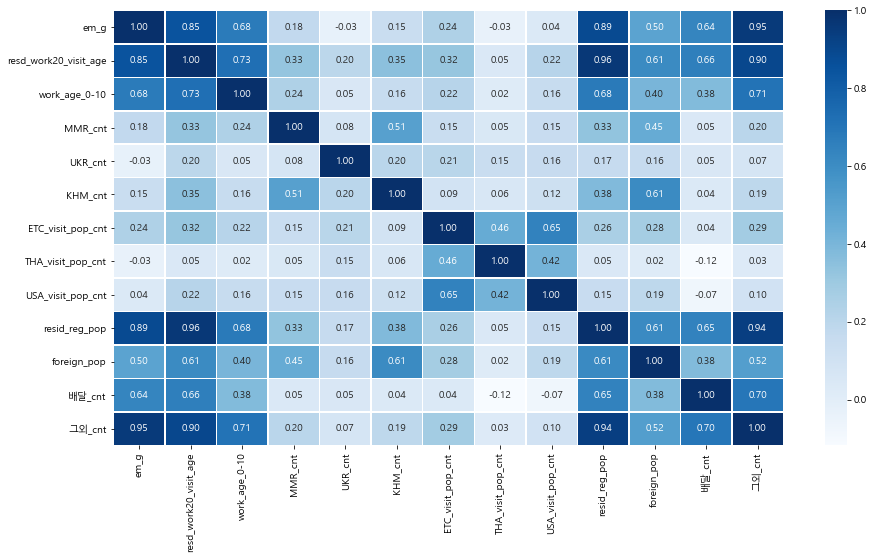

In [172]:
plt.figure(figsize=(15,8))
sns.heatmap(data=merge.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [173]:
merge['resd'] = merge['resd_work20_visit_age'] + merge['work_age_0-10']
merge['card_cnt'] = merge['배달_cnt'] + merge['그외_cnt']
merge = merge.drop(['resd_work20_visit_age', 'work_age_0-10', 'resid_reg_pop', '배달_cnt', '그외_cnt'], axis=1)

<AxesSubplot:>

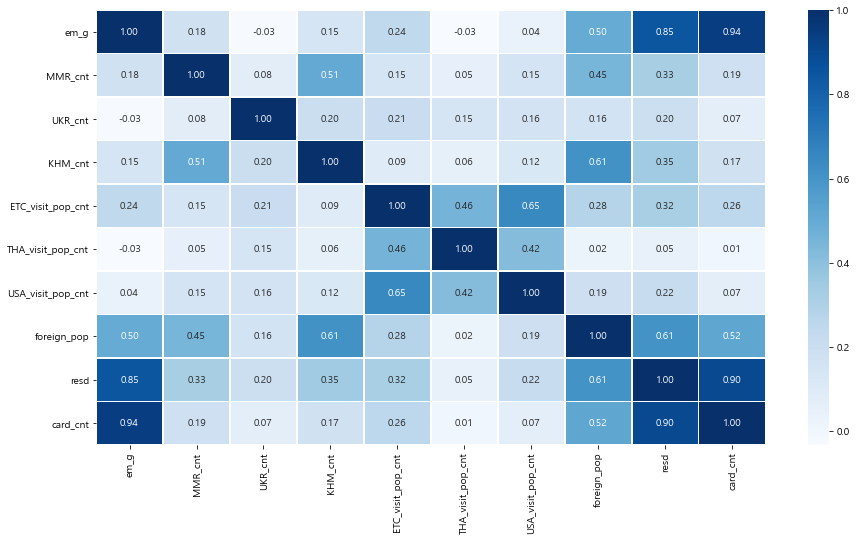

In [174]:
plt.figure(figsize=(15,8))
sns.heatmap(data=merge.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [175]:
merge = merge.drop(['card_cnt'], axis=1)

In [176]:
merge

,year,month,emd_nm,em_g,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,foreign_pop,resd
0,2018,1,건입동,45646550,631.6296,0.0,0.0000,73074.7683,4151.8176,996.4937,228,1.057882e+07
1,2018,1,남원읍,42437700,4062.3581,0.0,22491.4838,249053.2073,3670.9579,2840.9947,628,1.489578e+07
2,2018,1,노형동,265018400,2805.9870,0.0,19608.6107,193202.1085,4151.8177,2204.0138,1589,5.516836e+07
3,2018,1,대륜동,57612600,0.0000,0.0,5465.3049,41759.9073,328.3924,738.5766,178,1.568499e+07
4,2018,1,대정읍,38885550,4930.5983,0.0,11852.0676,31976.8707,7799.3186,1311.0684,1518,1.633659e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
1629,2021,6,표선면,41102950,1878.6960,0.0,4355.9460,1853.6653,21.5088,703.7967,334,1.260780e+07
1630,2021,6,한경면,27060150,785.3993,0.0,5349.6360,678.3721,9.0817,56.1932,337,8.557846e+06
1631,2021,6,한림읍,82746990,18693.3689,0.0,34049.4934,1620.5468,0.3168,140.9436,3230,2.366270e+07
1632,2021,6,화북동,110750050,3843.5535,0.0,7721.4600,210.6510,0.0000,114.2288,330,2.570348e+07


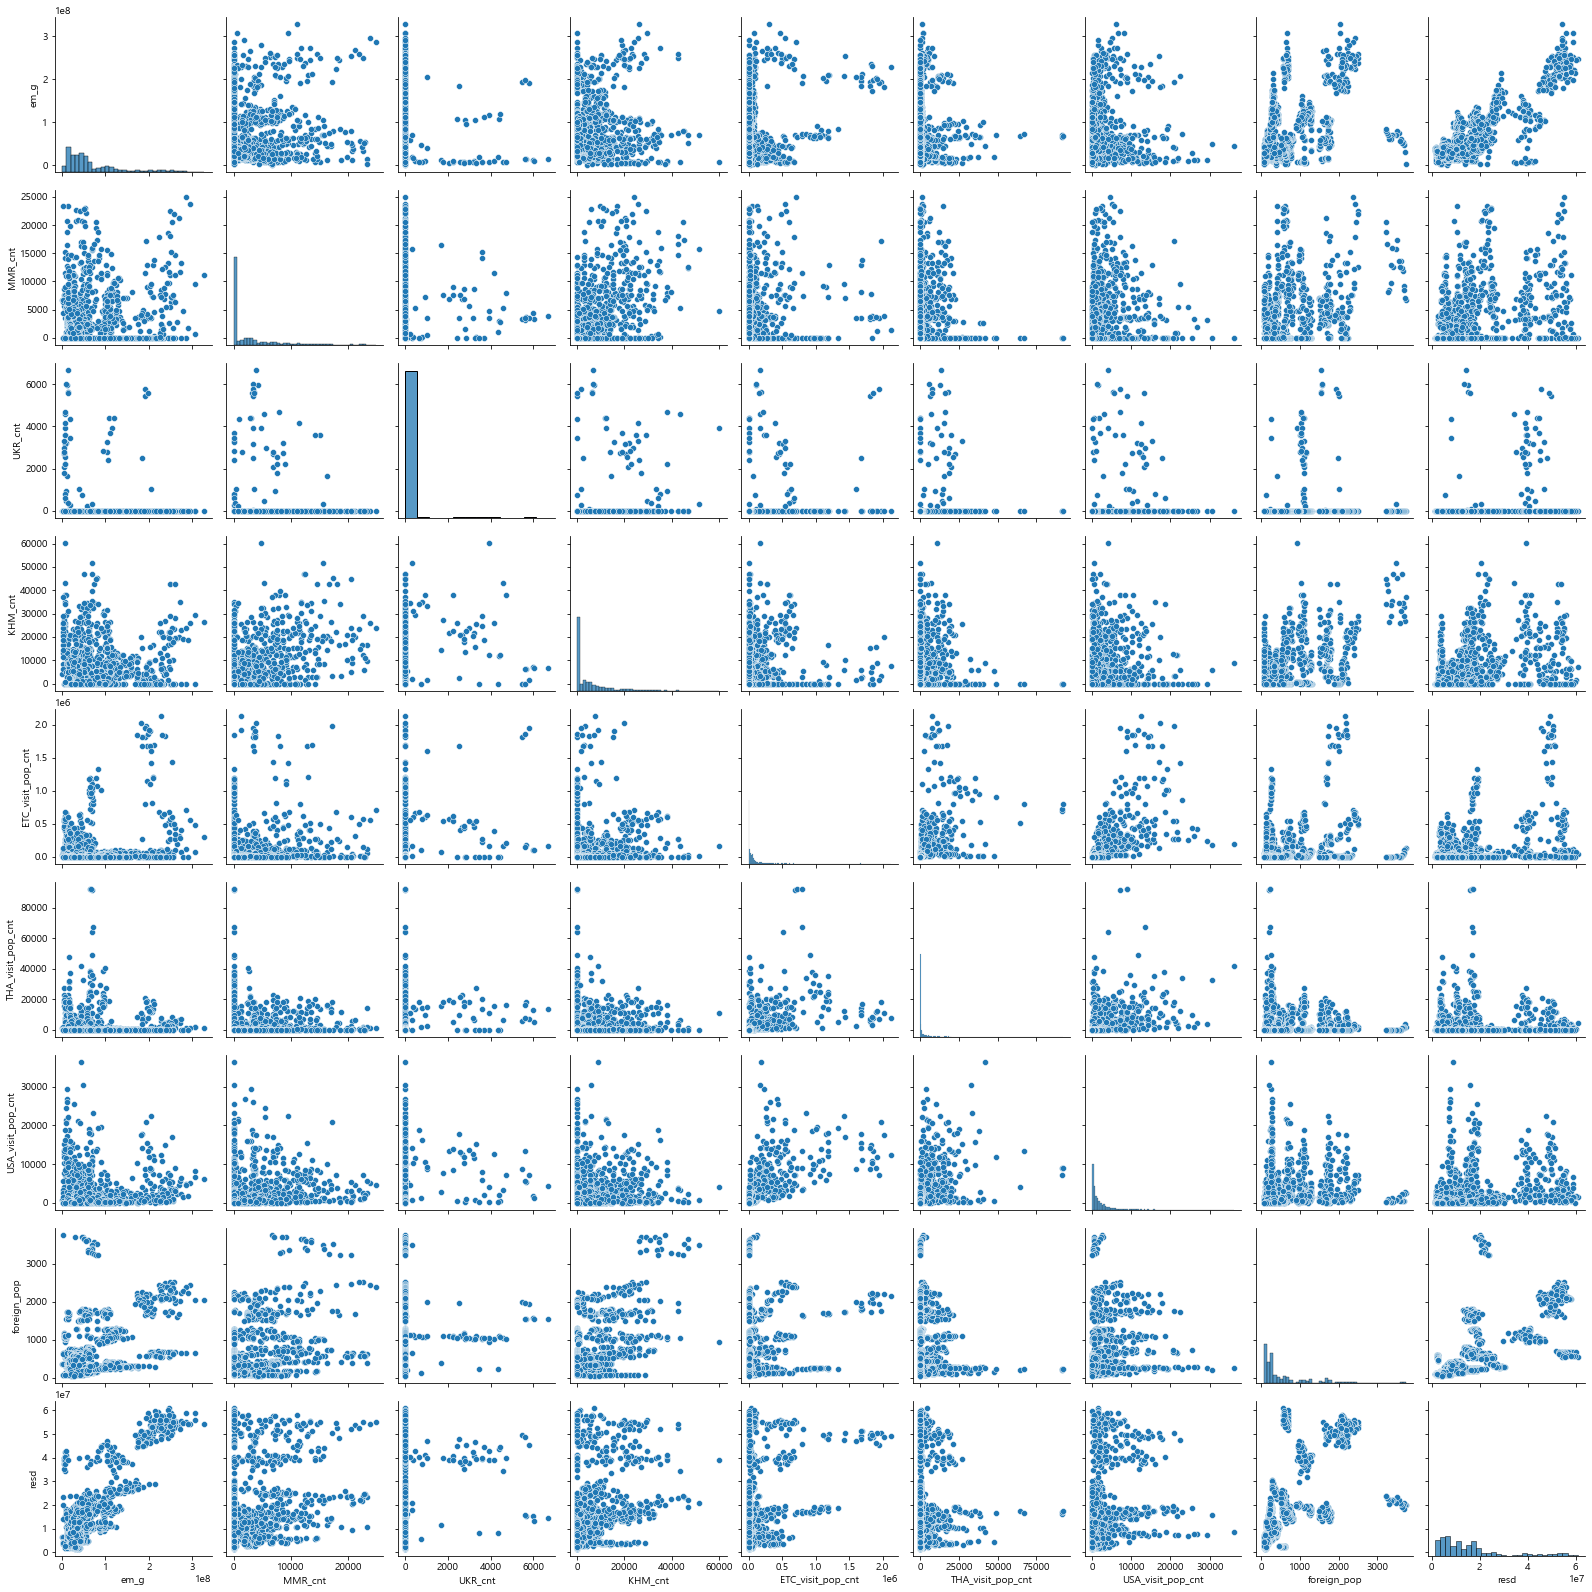

In [177]:
sns.pairplot(data=merge.drop(['year', 'month'], axis=1))

In [178]:
merge_vif = np.array(merge.drop(['year', 'month', 'emd_nm', 'em_g'], axis=1), dtype=float)
merge_vif = pd.DataFrame(merge_vif)
print(merge_vif)

               0    1           2            3          4          5       6  \
0       631.6296  0.0      0.0000   73074.7683  4151.8176   996.4937   228.0   
1      4062.3581  0.0  22491.4838  249053.2073  3670.9579  2840.9947   628.0   
2      2805.9870  0.0  19608.6107  193202.1085  4151.8177  2204.0138  1589.0   
3         0.0000  0.0   5465.3049   41759.9073   328.3924   738.5766   178.0   
4      4930.5983  0.0  11852.0676   31976.8707  7799.3186  1311.0684  1518.0   
...          ...  ...         ...          ...        ...        ...     ...   
1629   1878.6960  0.0   4355.9460    1853.6653    21.5088   703.7967   334.0   
1630    785.3993  0.0   5349.6360     678.3721     9.0817    56.1932   337.0   
1631  18693.3689  0.0  34049.4934    1620.5468     0.3168   140.9436  3230.0   
1632   3843.5535  0.0   7721.4600     210.6510     0.0000   114.2288   330.0   
1633   8352.5013  0.0   9177.7999     195.7674     2.5344     6.4484    57.0   

                 7  
0     1.057882e+07

In [179]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(merge_vif.values, i) for i in range(merge_vif.shape[1])]
vif["features"] = merge_vif.columns 
print(vif)

   VIF Factor  features
0    1.915554         0
1    1.119376         1
2    2.687691         2
3    2.374382         3
4    1.511640         4
5    2.359861         5
6    3.992946         6
7    2.972980         7


In [180]:
merge_log = pd.DataFrame()
merge_log['year'] = merge['year']
merge_log['month'] = merge['month']
merge_log['emd_nm'] = merge['emd_nm']
merge_log['em_g'] = np.log(merge['em_g'])
merge_log['MMR_cnt'] = np.log(merge['MMR_cnt']+1)
merge_log['UKR_cnt'] = np.log(merge['UKR_cnt']+1)
merge_log['KHM_cnt'] = np.log(merge['KHM_cnt']+1)
merge_log['ETC_visit_pop_cnt'] = np.log(merge['ETC_visit_pop_cnt']+1)
merge_log['THA_visit_pop_cnt'] = np.log(merge['THA_visit_pop_cnt']+1)
merge_log['USA_visit_pop_cnt'] = np.log(merge['USA_visit_pop_cnt']+1)
merge_log['foreign_pop'] = np.log(merge['foreign_pop']+1)
merge_log['resd'] = np.log(merge['resd'])

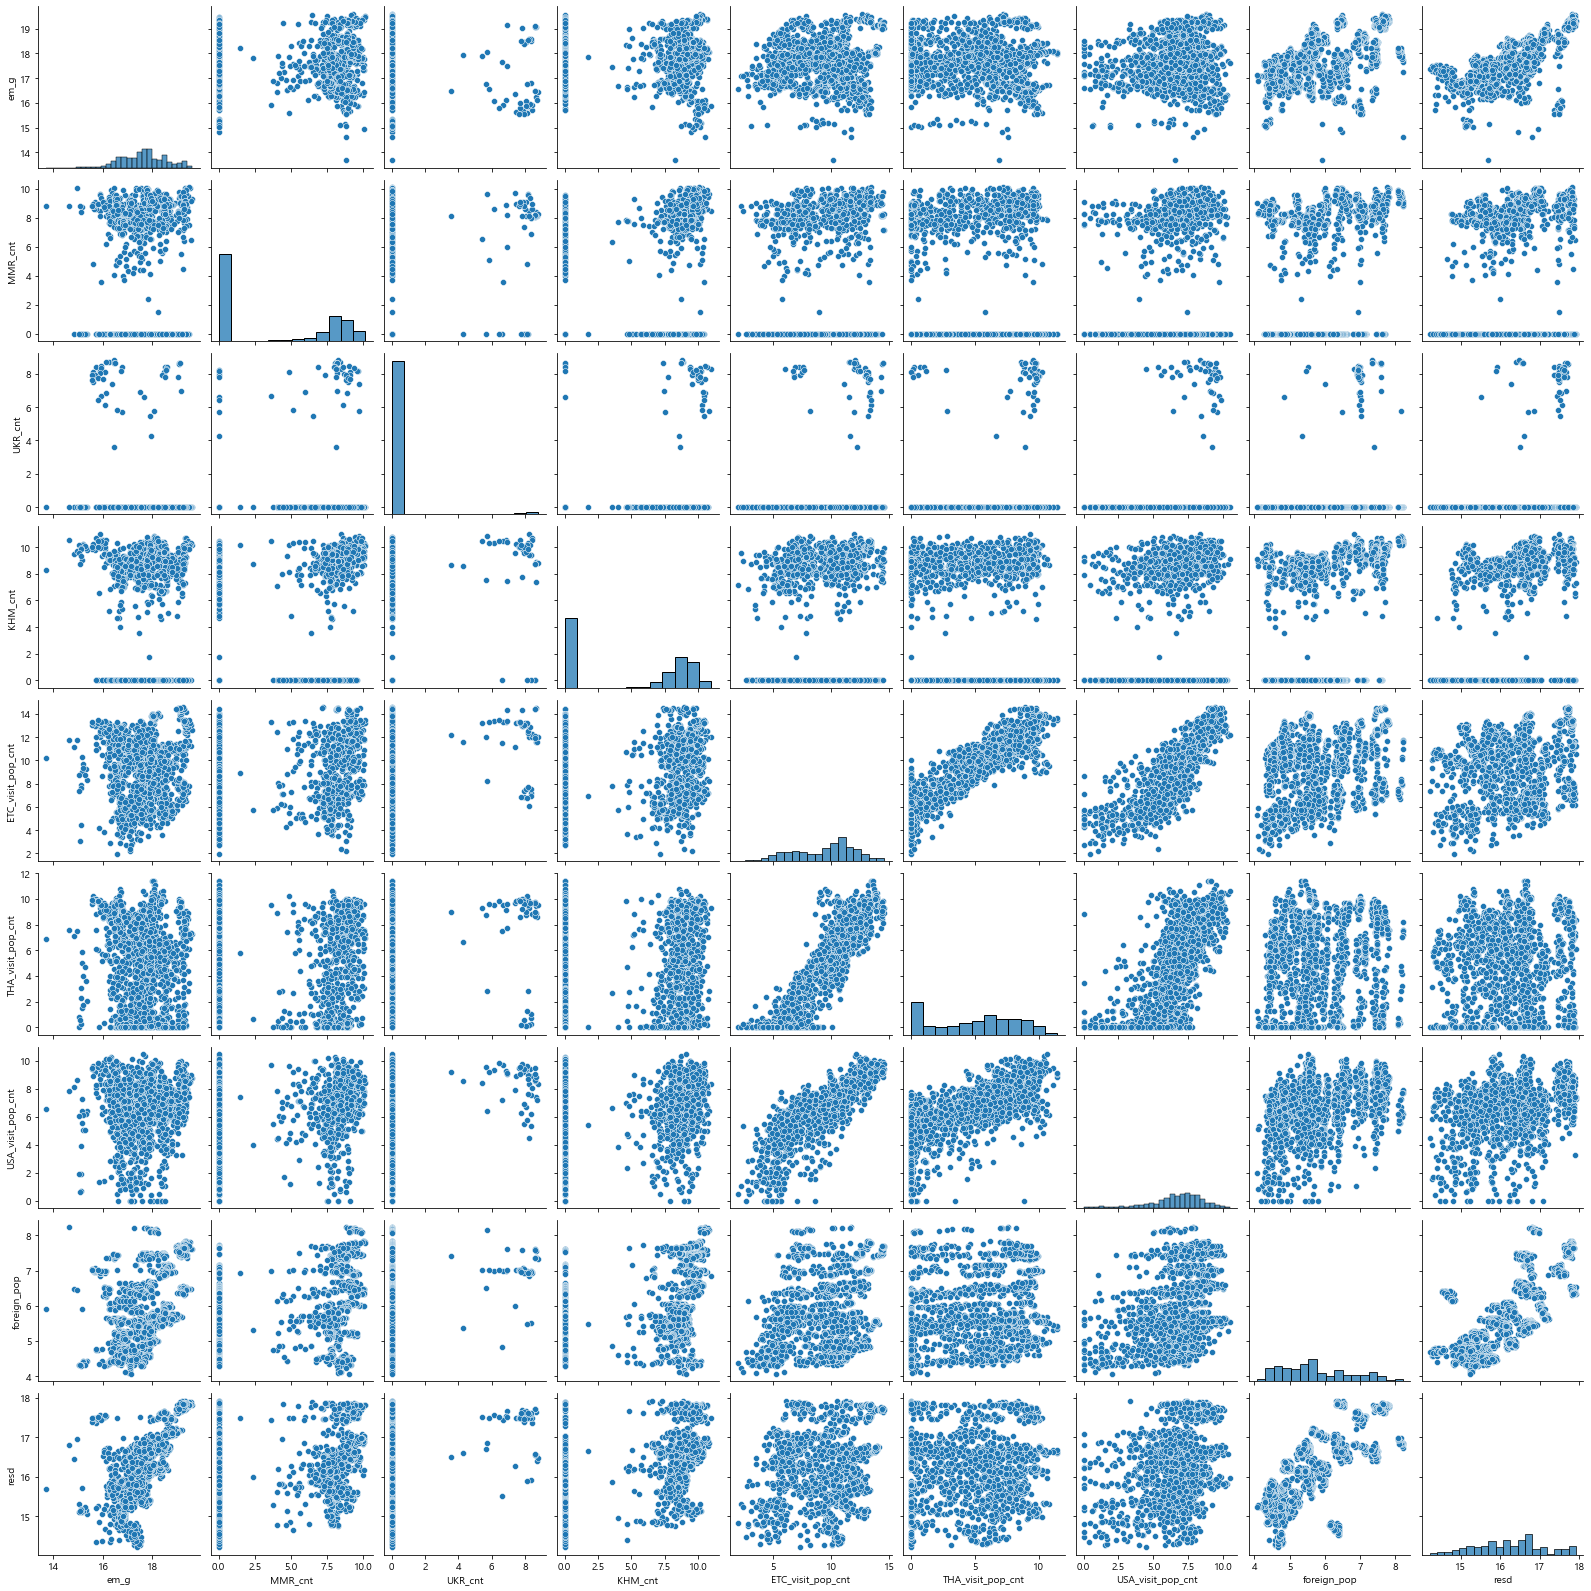

In [181]:
sns.pairplot(data=merge_log.drop(['year', 'month'], axis=1))

<AxesSubplot:>

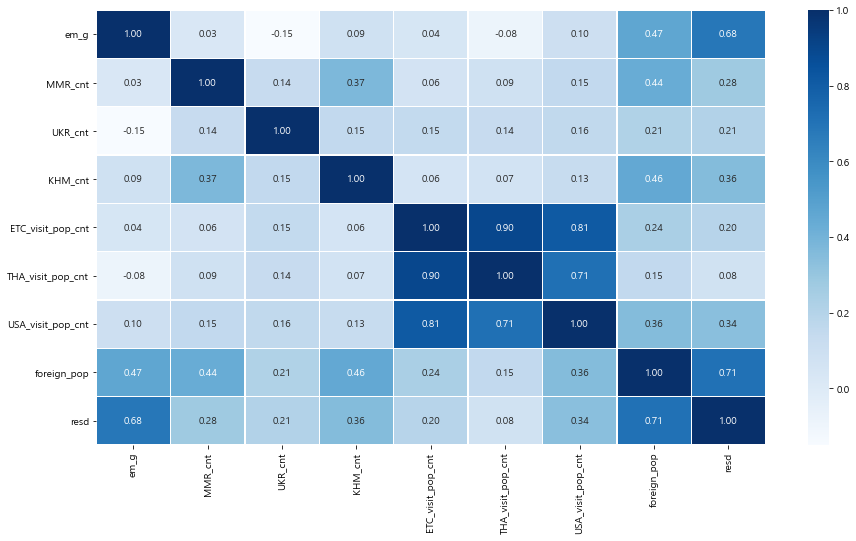

In [182]:
plt.figure(figsize=(15,8))
sns.heatmap(data=merge_log.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [183]:
merge_log["shortterm_frgn"] = merge_log["ETC_visit_pop_cnt"] + merge_log["THA_visit_pop_cnt"] + merge_log["USA_visit_pop_cnt"]
merge_log = merge_log.drop(['ETC_visit_pop_cnt', 'THA_visit_pop_cnt', 'USA_visit_pop_cnt'], axis=1)

<AxesSubplot:>

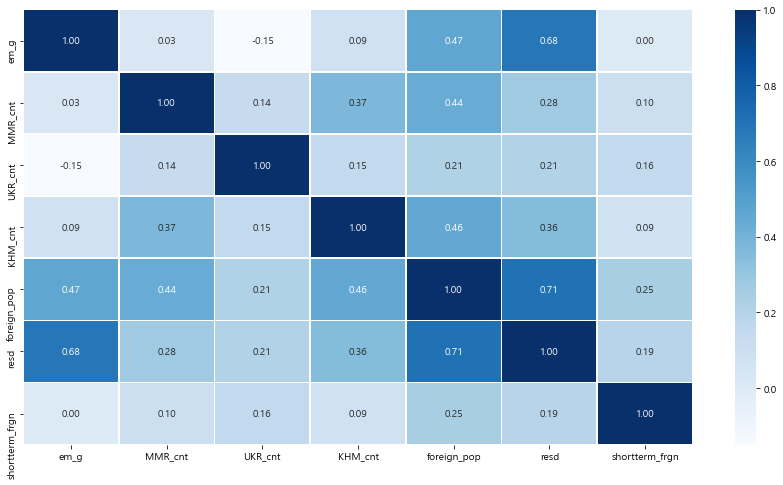

In [184]:
plt.figure(figsize=(15,8))
sns.heatmap(data=merge_log.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

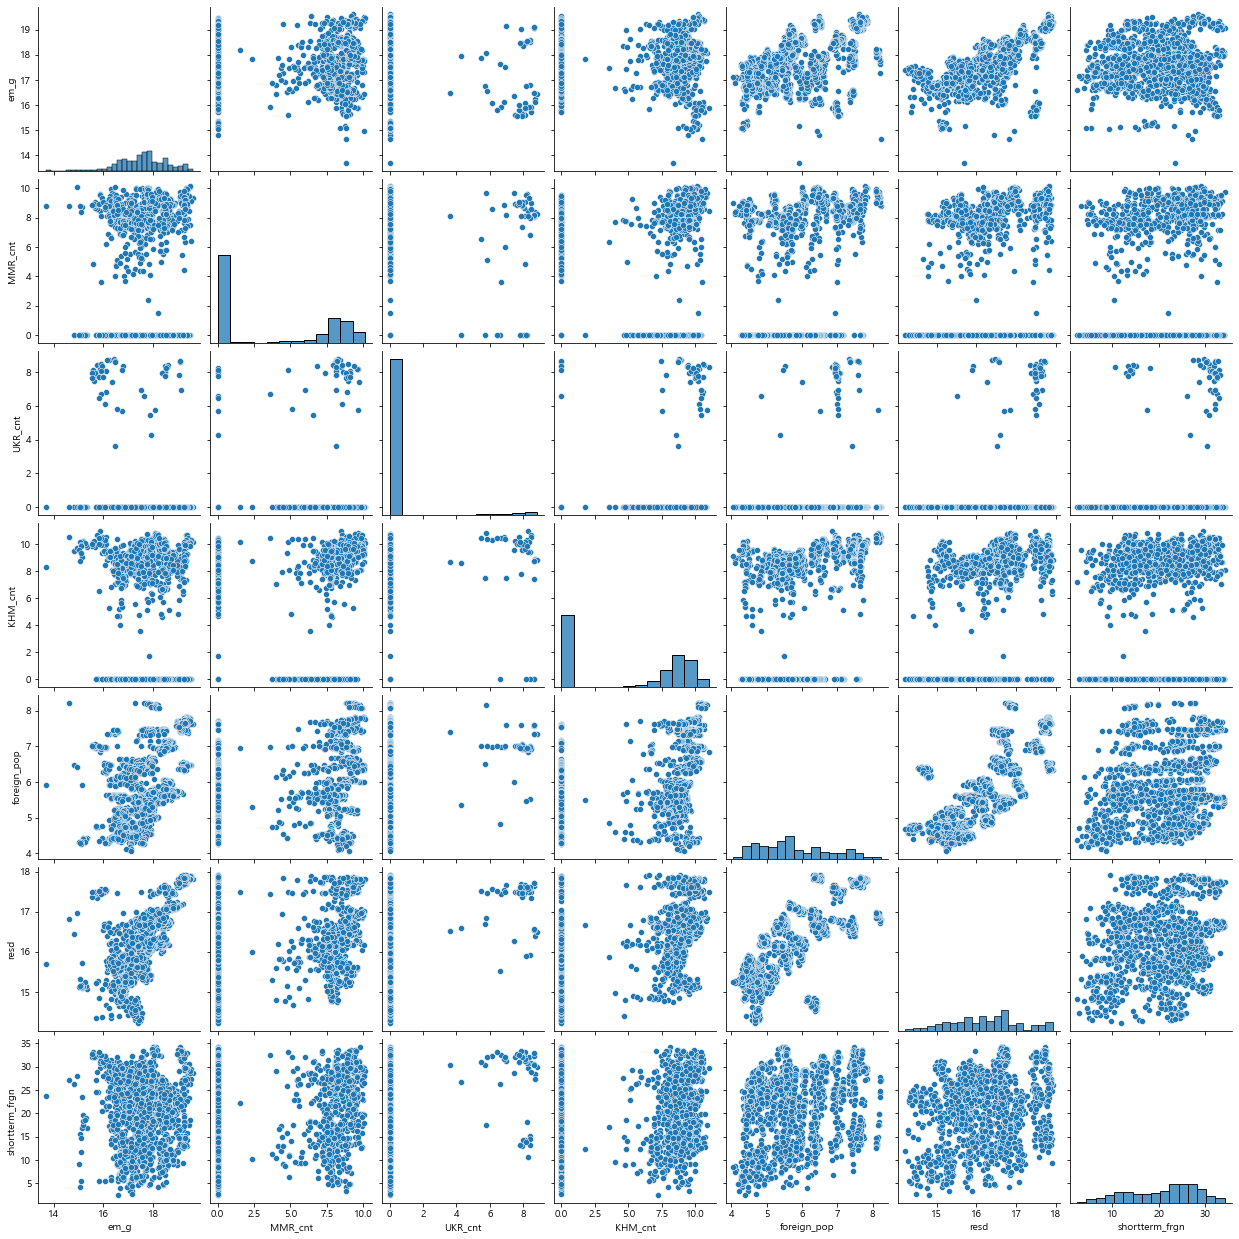

In [185]:
sns.pairplot(data=merge_log.drop(['year', 'month'], axis=1))

In [186]:
merge_log_vif = np.array(merge_log.drop(['year', 'month', 'emd_nm', 'em_g'], axis=1), dtype=float)
merge_log_vif = pd.DataFrame(merge_log_vif)
print(merge_log_vif)

             0    1          2         3          4          5
0     6.449885  0.0   0.000000  5.433722  16.174364  26.436040
1     8.309765  0.0  10.020936  6.444131  16.516589  28.586168
2     7.939867  0.0   9.883775  7.371489  17.825900  28.201529
3     0.000000  0.0   8.606358  5.187386  16.568215  23.043044
4     8.503418  0.0   9.380342  7.325808  16.608918  26.514079
...        ...  ...        ...       ...        ...        ...
1629  7.538865  0.0   8.379527  5.814131  16.349826  17.197275
1630  6.667465  0.0   8.584971  5.823046  15.962359  12.878326
1631  9.835978  0.0  10.435600  8.080547  16.979411  12.621770
1632  8.254413  0.0   8.951888  5.802118  17.062137  10.101858
1633  9.030436  0.0   9.124652  4.060443  15.237594   8.552565

[1634 rows x 6 columns]


In [187]:
log_vif = pd.DataFrame()
log_vif["VIF Factor"] = [variance_inflation_factor(merge_log_vif.values, i) for i in range(merge_log_vif.shape[1])]
log_vif["features"] = merge_log_vif.columns 
print(log_vif)

   VIF Factor  features
0    2.346428         0
1    1.089772         1
2    2.919045         2
3   73.870688         3
4   65.294901         4
5    9.729807         5


In [188]:
한림읍 = merge[merge['emd_nm']=='한림읍']
애월읍 = merge[merge['emd_nm']=='애월읍']
구좌읍 = merge[merge['emd_nm']=='구좌읍']
조천읍 = merge[merge['emd_nm']=='조천읍']
한경면 = merge[merge['emd_nm']=='한경면']
일도1동 = merge[merge['emd_nm']=='일도1동']
일도2동 = merge[merge['emd_nm']=='일도2동']
이도1동 = merge[merge['emd_nm']=='이도1동']
이도2동 = merge[merge['emd_nm']=='이도2동']
삼도1동 = merge[merge['emd_nm']=='삼도1동']
삼도2동 = merge[merge['emd_nm']=='삼도2동']
용담1동 = merge[merge['emd_nm']=='용담1동']
용담2동 = merge[merge['emd_nm']=='용담2동']
건입동 = merge[merge['emd_nm']=='건입동']
화북동 = merge[merge['emd_nm']=='화북동']
삼양동 = merge[merge['emd_nm']=='삼양동']
봉개동 = merge[merge['emd_nm']=='봉개동']
아라동 = merge[merge['emd_nm']=='아라동']
오라동 = merge[merge['emd_nm']=='오라동']
연동 = merge[merge['emd_nm']=='연동']
노형동 = merge[merge['emd_nm']=='노형동']
외도동 = merge[merge['emd_nm']=='외도동']
이호동 = merge[merge['emd_nm']=='이호동']
도두동 = merge[merge['emd_nm']=='도두동']
대정읍 = merge[merge['emd_nm']=='대정읍']
남원읍 = merge[merge['emd_nm']=='남원읍']
성산읍 = merge[merge['emd_nm']=='성산읍']
안덕면 = merge[merge['emd_nm']=='안덕면']
표선면 = merge[merge['emd_nm']=='표선면']
송산동 = merge[merge['emd_nm']=='송산동']
정방동 = merge[merge['emd_nm']=='정방동']
중앙동 = merge[merge['emd_nm']=='중앙동']
천지동 = merge[merge['emd_nm']=='천지동']
효돈동 = merge[merge['emd_nm']=='효돈동']
영천동 = merge[merge['emd_nm']=='영천동']
동홍동 = merge[merge['emd_nm']=='동홍동']
서홍동 = merge[merge['emd_nm']=='서홍동']
대륜동 = merge[merge['emd_nm']=='대륜동']
대천동 = merge[merge['emd_nm']=='대천동']
중문동 = merge[merge['emd_nm']=='중문동']
예래동 = merge[merge['emd_nm']=='예래동']
알수없음 = merge[merge['emd_nm']=='알수없음']

In [189]:
한림읍

,year,month,emd_nm,em_g,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,foreign_pop,resd
852,2019,11,한림읍,2279550,6760.3381,0.0000,37213.9978,124692.1839,1985.2189,2483.9978,3749,2.003446e+07
893,2019,12,한림읍,31493650,7079.3330,0.0000,26881.1382,115695.2098,3593.7502,2835.7009,3715,2.020031e+07
934,2020,1,한림읍,49632850,9166.2973,0.0000,33015.2200,108672.6866,1802.3223,2283.2945,3703,2.069762e+07
975,2020,2,한림읍,46197050,8433.4137,0.0000,28965.8022,58489.3496,1271.7984,491.6509,3695,1.825726e+07
1016,2020,3,한림읍,52561750,11779.1929,0.0000,34612.0786,28067.6752,1155.5167,438.2510,3662,1.999214e+07
1057,2020,4,한림읍,52242650,12389.9349,0.0000,46861.3990,23646.8223,1102.2235,2150.7210,3646,1.924229e+07
1098,2020,5,한림읍,61167800,13621.1028,0.0000,31028.9602,2688.2491,63.9332,406.3359,3614,2.050745e+07
1139,2020,6,한림읍,55895800,12599.8886,0.0000,26061.0183,2867.5275,24.8153,551.2161,3604,2.090711e+07
1180,2020,7,한림읍,74343450,13592.9343,0.0000,34611.1362,3278.9884,78.1244,1477.4445,3563,2.203440e+07
1221,2020,8,한림읍,80336450,17325.7754,0.0000,45216.1652,4427.3867,114.2509,817.0964,3518,2.357500e+07


In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()
scaler5 = StandardScaler()
scaler6 = StandardScaler()
scaler7 = StandardScaler()
scaler8 = StandardScaler()
scaler9 = StandardScaler()

In [191]:
한림읍['em_g'] = scaler.fit_transform(한림읍[['em_g']])
한림읍['MMR_cnt'] = scaler2.fit_transform(한림읍[['MMR_cnt']])
한림읍['UKR_cnt'] = scaler3.fit_transform(한림읍[['UKR_cnt']])
한림읍['KHM_cnt'] = scaler4.fit_transform(한림읍[['KHM_cnt']])
한림읍['ETC_visit_pop_cnt'] = scaler5.fit_transform(한림읍[['ETC_visit_pop_cnt']])
한림읍['THA_visit_pop_cnt'] = scaler6.fit_transform(한림읍[['THA_visit_pop_cnt']])
한림읍['USA_visit_pop_cnt'] = scaler7.fit_transform(한림읍[['USA_visit_pop_cnt']])
한림읍['foreign_pop'] = scaler8.fit_transform(한림읍[['foreign_pop']])
한림읍['resd'] = scaler9.fit_transform(한림읍[['resd']])

<ipython-input-191-d57b988061f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한림읍['em_g'] = scaler.fit_transform(한림읍[['em_g']])
<ipython-input-191-d57b988061f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  한림읍['MMR_cnt'] = scaler2.fit_transform(한림읍[['MMR_cnt']])
<ipython-input-191-d57b988061f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [192]:
한림읍_x = 한림읍.drop(['year','month', 'emd_nm', 'em_g'], axis=1)
한림읍_x = sm.add_constant(한림읍_x)
한림읍_y = 한림읍.loc[:,['em_g']]

In [193]:
model_한림읍 = sm.OLS(한림읍_y, 한림읍_x)
result_한림읍 = model_한림읍.fit()
result_한림읍.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     7.964
Date:                Wed, 01 Sep 2021   Prob (F-statistic):            0.00123
Time:                        16:54:32   Log-Likelihood:                -9.2213
No. Observations:                  20   AIC:                             36.44
Df Residuals:                      11   BIC:                             45.40
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.874e-16      0.116  -1.62e-15      1.000      -0.255       0.255
MMR_cnt               0.1819      0.214      0.850      0.414      -0.289       0.653
UKR_cnt               0.0720      0.143      0.504      0.624      -0.243       0.386
KHM_cnt              -0.0346      0.160     -0.217      0.832      -0.386       0.317
ETC_visit_pop_cnt    -0.7652      0.337     -2.270      0.044      -1.507      -0.023
THA_visit_pop_cnt     0.2352      0.333      0.706      0.495      -0.498       0.969
USA_visit_pop_cnt    -0.0191      0.215     -0.089      0.931      -0.491       0.453
foreign_pop          -0.0042      0.235     -0.018      0.986      -0.522       0.513
resd                  0.3346      0.249      1.343      0.206      -0.214       0.883
==============================================================================
Omnibus:                        5.548   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.664
Skew:                           0.060   Prob(JB):                       0.0971
Kurtosis:                       5.363   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
month_1 = merge[merge['month'] == 1]
month_2 = merge[merge['month'] == 2]
month_3 = merge[merge['month'] == 3]
month_4 = merge[merge['month'] == 4]
month_5 = merge[merge['month'] == 5]
month_6 = merge[merge['month'] == 6]
month_7 = merge[merge['month'] == 7]
month_8 = merge[merge['month'] == 8]
month_9 = merge[merge['month'] == 9]
month_10 = merge[merge['month'] == 10]
month_11 = merge[merge['month'] == 11]
month_12 = merge[merge['month'] == 12]

In [195]:
month_1 = month_1.reset_index()
month_1 = month_1.drop(['index'], axis=1)

In [196]:
month_1

,year,month,emd_nm,em_g,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,foreign_pop,resd
0,2018,1,건입동,45646550,631.6296,0.0000,0.0000,7.307477e+04,4151.8176,996.4937,228,1.057882e+07
1,2018,1,남원읍,42437700,4062.3581,0.0000,22491.4838,2.490532e+05,3670.9579,2840.9947,628,1.489578e+07
2,2018,1,노형동,265018400,2805.9870,0.0000,19608.6107,1.932021e+05,4151.8177,2204.0138,1589,5.516836e+07
3,2018,1,대륜동,57612600,0.0000,0.0000,5465.3049,4.175991e+04,328.3924,738.5766,178,1.568499e+07
4,2018,1,대정읍,38885550,4930.5983,0.0000,11852.0676,3.197687e+04,7799.3186,1311.0684,1518,1.633659e+07
5,2018,1,대천동,53858550,0.0000,0.0000,10080.8997,1.545875e+04,551.2301,341.9340,244,9.047796e+06
6,2018,1,도두동,14694200,0.0000,0.0000,14689.7597,8.698063e+04,15375.7966,969.1384,98,3.691374e+06
7,2018,1,동홍동,118701000,0.0000,0.0000,11826.1462,2.800463e+04,891.3508,781.5647,1266,1.788542e+07
8,2018,1,봉개동,10390450,0.0000,0.0000,0.0000,1.424719e+04,586.4150,300.9006,76,5.352583e+06
9,2018,1,삼도1동,71078500,0.0000,0.0000,0.0000,1.633448e+04,152.4679,56.6631,141,1.176857e+07


In [197]:
month_1_scaled = pd.DataFrame()
month_1_scaled['year'] = month_1['year']
month_1_scaled['month'] = month_1['month']
month_1_scaled['emd_nm'] = month_1['emd_nm']
month_1_scaled['em_g'] = scaler.fit_transform(month_1[['em_g']])
month_1_scaled['MMR_cnt'] = scaler2.fit_transform(month_1[['MMR_cnt']])
month_1_scaled['UKR_cnt'] = scaler3.fit_transform(month_1[['UKR_cnt']])
month_1_scaled['KHM_cnt'] = scaler4.fit_transform(month_1[['KHM_cnt']])
month_1_scaled['ETC_visit_pop_cnt'] = scaler5.fit_transform(month_1[['ETC_visit_pop_cnt']])
month_1_scaled['THA_visit_pop_cnt'] = scaler6.fit_transform(month_1[['THA_visit_pop_cnt']])
month_1_scaled['USA_visit_pop_cnt'] = scaler7.fit_transform(month_1[['USA_visit_pop_cnt']])
month_1_scaled['foreign_pop'] = scaler8.fit_transform(month_1[['foreign_pop']])
month_1_scaled['resd'] = scaler9.fit_transform(month_1[['resd']])

In [198]:
fit1 = ols('em_g~MMR_cnt+UKR_cnt+KHM_cnt+ETC_visit_pop_cnt+THA_visit_pop_cnt+USA_visit_pop_cnt+foreign_pop+resd', data=month_1_scaled).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   em_g   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           6.43e-57
Time:                        16:54:51   Log-Likelihood:                -72.686
No. Observations:                 156   AIC:                             163.4
Df Residuals:                     147   BIC:                             190.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.806e-18      0.03

In [199]:
fit1 = ols('em_g~MMR_cnt+UKR_cnt+KHM_cnt+USA_visit_pop_cnt+foreign_pop+resd', data=month_1_scaled).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   em_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           1.02e-58
Time:                        16:55:19   Log-Likelihood:                -73.541
No. Observations:                 156   AIC:                             161.1
Df Residuals:                     149   BIC:                             182.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -7.806e-18      0.03

In [200]:
fitted1 = fit1.predict(month_1_x)

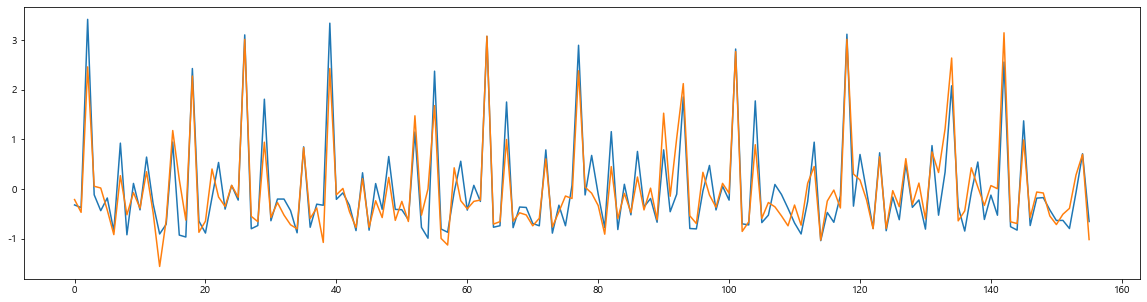

In [202]:
plt.figure(figsize=(20,5))
plt.plot(month_1_scaled['em_g'])
plt.plot(fitted1)
plt.show()

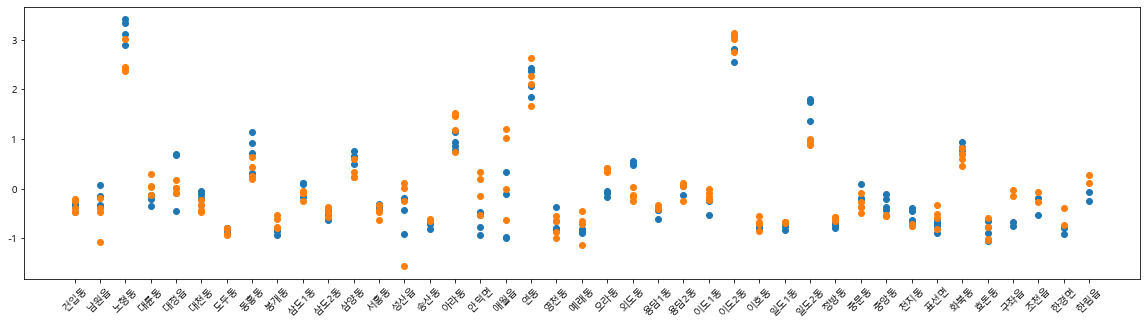

In [203]:
plt.figure(figsize=(20,5))
plt.scatter(month_1_scaled['emd_nm'],month_1_scaled['em_g'])
plt.scatter(month_1_scaled['emd_nm'],fitted1)
plt.xticks(rotation=45)
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


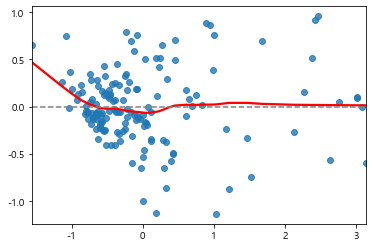

In [204]:
%matplotlib inline

residual = month_1_scaled['em_g'] - fitted1
sns.regplot(fitted1, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted1.min(), fitted1.max()], [0, 0], '--', color='grey')

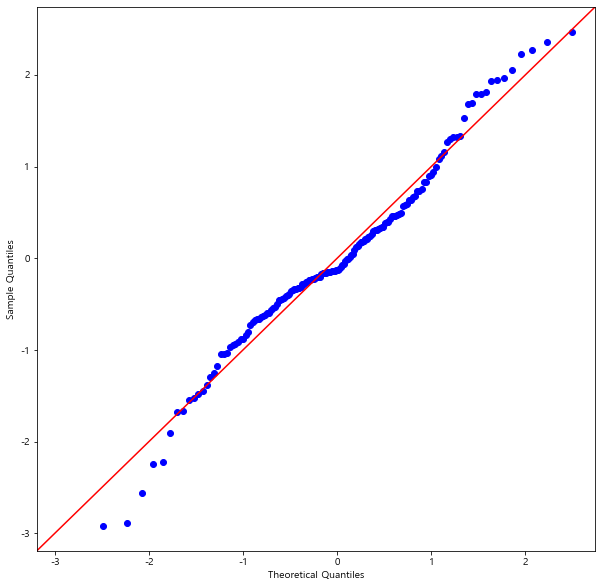

In [205]:
plt.rcParams["figure.figsize"] = (10, 10)
sm.qqplot(fit1.resid, fit = True, dist = stats.norm, line = "45")
plt.show()

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

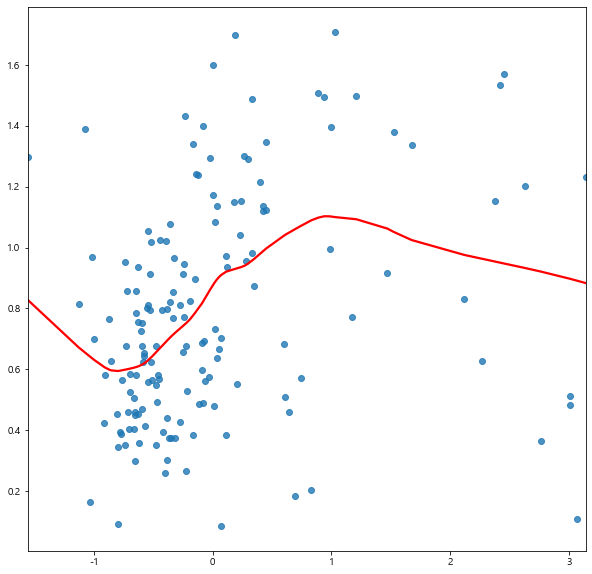

In [206]:
zres = stats.zscore(residual)
sns.regplot(fitted1, np.sqrt(np.abs(zres)), lowess=True, line_kws={'color': 'red'})

In [300]:
month_1_train, month_1_test = train_test_split(month_1, train_size=0.8, random_state=1, shuffle=True)
month_1_train = month_1_train.reset_index()
month_1_train = month_1_train.drop(['index'], axis=1)

In [301]:
month_1_train_scaled = pd.DataFrame()
month_1_train_scaled['year'] = month_1_train['year']
month_1_train_scaled['month'] = month_1_train['month']
month_1_train_scaled['emd_nm'] = month_1_train['emd_nm']
month_1_train_scaled['em_g'] = scaler.fit_transform(month_1_train[['em_g']])
month_1_train_scaled['MMR_cnt'] = scaler2.fit_transform(month_1_train[['MMR_cnt']])
month_1_train_scaled['UKR_cnt'] = scaler3.fit_transform(month_1_train[['UKR_cnt']])
month_1_train_scaled['KHM_cnt'] = scaler4.fit_transform(month_1_train[['KHM_cnt']])
month_1_train_scaled['ETC_visit_pop_cnt'] = scaler5.fit_transform(month_1_train[['ETC_visit_pop_cnt']])
month_1_train_scaled['THA_visit_pop_cnt'] = scaler6.fit_transform(month_1_train[['THA_visit_pop_cnt']])
month_1_train_scaled['USA_visit_pop_cnt'] = scaler7.fit_transform(month_1_train[['USA_visit_pop_cnt']])
month_1_train_scaled['foreign_pop'] = scaler8.fit_transform(month_1_train[['foreign_pop']])
month_1_train_scaled['resd'] = scaler9.fit_transform(month_1_train[['resd']])

In [302]:
month_1_train

,year,month,emd_nm,em_g,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,foreign_pop,resd
0,2019,1,일도2동,167320100,0.0000,0.0000,4239.3139,8.617528e+04,121.7325,779.4795,308,2.944171e+07
1,2018,1,천지동,38935950,0.0000,0.0000,0.0000,1.707194e+04,187.6528,334.1171,96,2.263212e+06
2,2021,1,이도1동,33481750,0.0000,0.0000,0.0000,1.905968e+02,0.0178,1.2070,123,1.296820e+07
3,2019,1,외도동,97317450,2928.7761,0.0000,306.0218,3.574846e+04,21429.1101,425.7160,299,1.073301e+07
4,2021,1,삼양동,94467640,0.0000,0.0000,3192.9312,2.065617e+02,0.0000,35.6065,235,2.278585e+07
5,2021,1,아라동,115795850,3431.4531,3931.4781,12437.7192,4.198842e+02,0.1691,85.6970,1045,4.303366e+07
6,2021,1,중문동,54313151,0.0000,0.0000,306.4848,2.493694e+03,20.4224,619.2105,287,1.187819e+07
7,2021,1,삼도1동,55008750,0.0000,0.0000,0.0000,3.243510e+01,0.0000,2.4140,136,1.234797e+07
8,2019,1,오라동,60950700,0.0000,0.0000,0.0000,4.454651e+04,3314.2937,413.7236,240,1.946489e+07
9,2018,1,일도1동,21302450,0.0000,0.0000,0.0000,1.270125e+04,926.5356,453.3054,88,3.357307e+06


In [303]:
fit1 = ols('em_g~MMR_cnt+UKR_cnt+KHM_cnt+ETC_visit_pop_cnt+THA_visit_pop_cnt+USA_visit_pop_cnt+foreign_pop+resd', data=month_1_train_scaled).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   em_g   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     99.21
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           5.67e-48
Time:                        17:30:44   Log-Likelihood:                -47.789
No. Observations:                 124   AIC:                             113.6
Df Residuals:                     115   BIC:                             139.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.163e-17      0.03

In [304]:
fit1 = ols('em_g~MMR_cnt+UKR_cnt+KHM_cnt+ETC_visit_pop_cnt+USA_visit_pop_cnt+foreign_pop+resd', data=month_1_train_scaled).fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                   em_g   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 01 Sep 2021   Prob (F-statistic):           5.30e-49
Time:                        17:30:44   Log-Likelihood:                -47.832
No. Observations:                 124   AIC:                             111.7
Df Residuals:                     116   BIC:                             134.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.163e-17      0.03

In [305]:
month_1_test = month_1_test.reset_index()
month_1_test = month_1_test.drop(['index'], axis=1)

In [306]:
month_1_test

,year,month,emd_nm,em_g,MMR_cnt,UKR_cnt,KHM_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,foreign_pop,resd
0,2021,1,남원읍,56595100,8572.9615,0.0000,18915.0060,1.144547e+04,131.0250,2363.9977,696,1.687392e+07
1,2020,1,구좌읍,21059800,2979.3027,0.0000,10955.6628,6.120976e+04,557.1658,1191.3663,654,1.478018e+07
2,2019,1,송산동,28136200,0.0000,0.0000,0.0000,1.165150e+04,288.3908,1049.2996,596,2.653746e+06
3,2018,1,중문동,52591350,0.0000,0.0000,0.0000,3.349882e+04,187.6528,629.1574,279,8.892412e+06
4,2018,1,화북동,114334400,0.0000,0.0000,3151.6472,8.616031e+03,0.0000,9.7695,361,2.581693e+07
5,2019,1,대륜동,52272200,0.0000,0.0000,6419.0076,5.386883e+04,785.4657,4221.1674,210,1.639668e+07
6,2018,1,송산동,22834700,498.8742,0.0000,0.0000,6.597130e+03,35.1849,234.4680,523,2.700581e+06
7,2020,1,천지동,41595800,0.0000,0.0000,0.0000,3.612116e+04,30.2801,336.9746,111,1.917639e+06
8,2019,1,안덕면,19138700,0.0000,294.6541,1807.5091,1.632818e+05,6211.2201,14144.4871,665,1.795526e+07
9,2021,1,정방동,21318250,397.2465,0.0000,0.0000,1.106548e+02,0.0445,105.0090,118,4.419819e+06


In [307]:
month_1_test_scaled = pd.DataFrame()
month_1_test_scaled['year'] = month_1_test['year']
month_1_test_scaled['MMR_cnt'] = scaler2.transform(month_1_test[['MMR_cnt']])
month_1_test_scaled['UKR_cnt'] = scaler3.transform(month_1_test[['UKR_cnt']])
month_1_test_scaled['KHM_cnt'] = scaler4.transform(month_1_test[['KHM_cnt']])
month_1_test_scaled['ETC_visit_pop_cnt'] = scaler5.transform(month_1_test[['ETC_visit_pop_cnt']])
month_1_test_scaled['USA_visit_pop_cnt'] = scaler7.transform(month_1_test[['USA_visit_pop_cnt']])
month_1_test_scaled['foreign_pop'] = scaler8.transform(month_1_test[['foreign_pop']])
month_1_test_scaled['resd'] = scaler9.transform(month_1_test[['resd']])

In [311]:
month_1_test_x = month_1_test_scaled.drop(['year'], axis=1)
month_1_test_y = month_1_test.loc[:,['em_g']]

In [312]:
fitted1 = fit1.predict(month_1_test_x)
predicted1 = scaler.inverse_transform(fitted1)

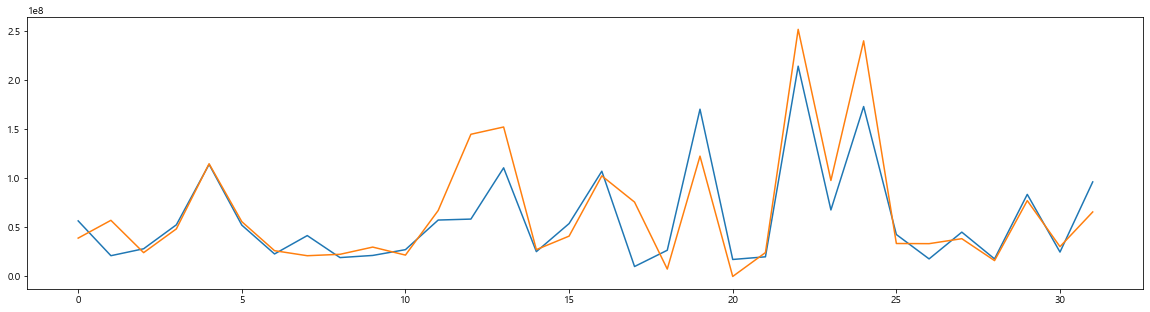

In [313]:
plt.figure(figsize=(20,5))
plt.plot(month_1_test_y)
plt.plot(predicted1)
plt.show()

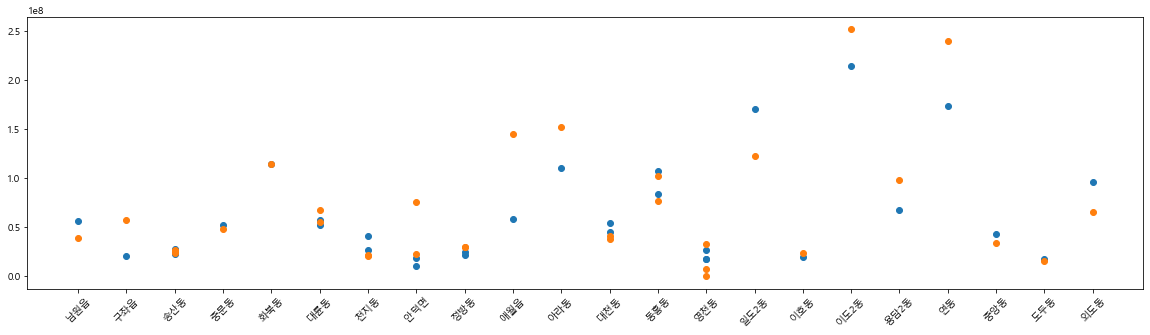

In [314]:
plt.figure(figsize=(20,5))
plt.scatter(month_1_test['emd_nm'], month_1_test_y)
plt.scatter(month_1_test['emd_nm'], predicted1)
plt.xticks(rotation=45)
plt.show()

In [330]:
import folium
import json

geo_data = 'HangJeongDong.geojson'

In [331]:
center = [35.958, 126.712189]

m = folium.Map(location=center, zoom_start=10)

folium.Choropleth(geo_data=geo_data, data=foodwaste, columns=('emd_nm', 'em_g'), key_on='feature.properties.동', fill_color='BuPu', legend_name='음식물쓰레기 배출량',).add_to(m)

print(m)

UnicodeDecodeError: 'cp949' codec can't decode byte 0xec in position 210: illegal multibyte sequence